In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd

### Имеется датасет с данными о 333 пингвинах. По каждому пингвину известно: 
- species - информация о виде пингвина;
- island - название острова в архипелаге Палмера;
- bill_length_mm - длина клюва в мм;
- bill_depth_mm - толщина клюва в мм;
- flipper_length_mm - длина крыла в мм;
- body_mass_g - масса тела в граммах;
- sex - пол особи.


Необходимо на основе этих данных построить ряд классификаторов и проверить их работу.


# Задание 1 (в классе). Предварительное исследование данных

### 1. Загрузить данные из файла «pinguins.csv». Проверить, что загружены все 333 кортежа данных по всем 7 признакам


In [3]:
df = pd.read_csv("penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


### 2. Определить типы данных

In [7]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm      int64
body_mass_g            int64
sex                   object
dtype: object

### 3. Определить параметры числовых данных


In [8]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


### 4. Для нечисловых (текстовых) данных определить количество записей по каждому элементу и визуализировать гистограммы, например, так (для признака «species»)

In [12]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.head()

,species,island,sex
0,Adelie,Torgersen,male
1,Adelie,Torgersen,female
2,Adelie,Torgersen,female
3,Adelie,Torgersen,female
4,Adelie,Torgersen,male


species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64
sex
male      168
female    165
Name: count, dtype: int64


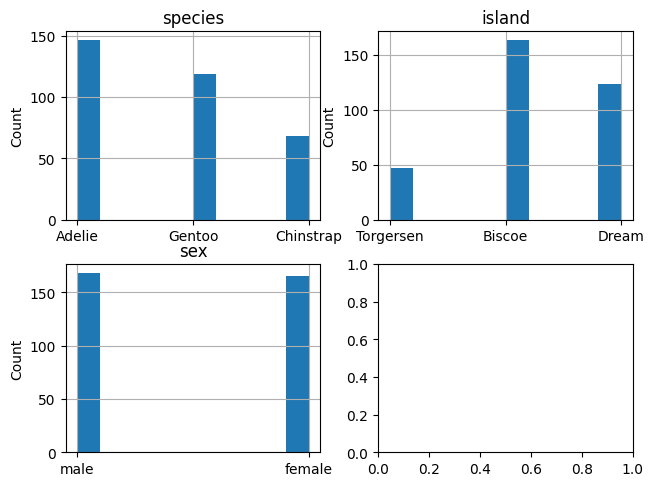

In [33]:
fig, ax = plt.subplots(2,2)
ax = (i for i in ax.flatten())
plt.tight_layout()
for i, col in enumerate(df_obj.columns):
    print(df_obj[col].value_counts())
    cur_ax = next(ax)
    cur_ax.hist(df_obj[col])
    cur_ax.grid(1)
    cur_ax.set_title(col)
    cur_ax.set_ylabel("Count")
    
    

### 5. Для каждого текстового признака построить мозаику 2D диаграмм рассеяния выбирая в качестве параметров всевозможные пары числовых признаков, аналогично мозаике диаграмм для ирисов.


На основе полученных результатов сделать предварительную оценку качества классификации пингвинов по каждому из трёх текстовых признаков на основе только числовых признаков. 


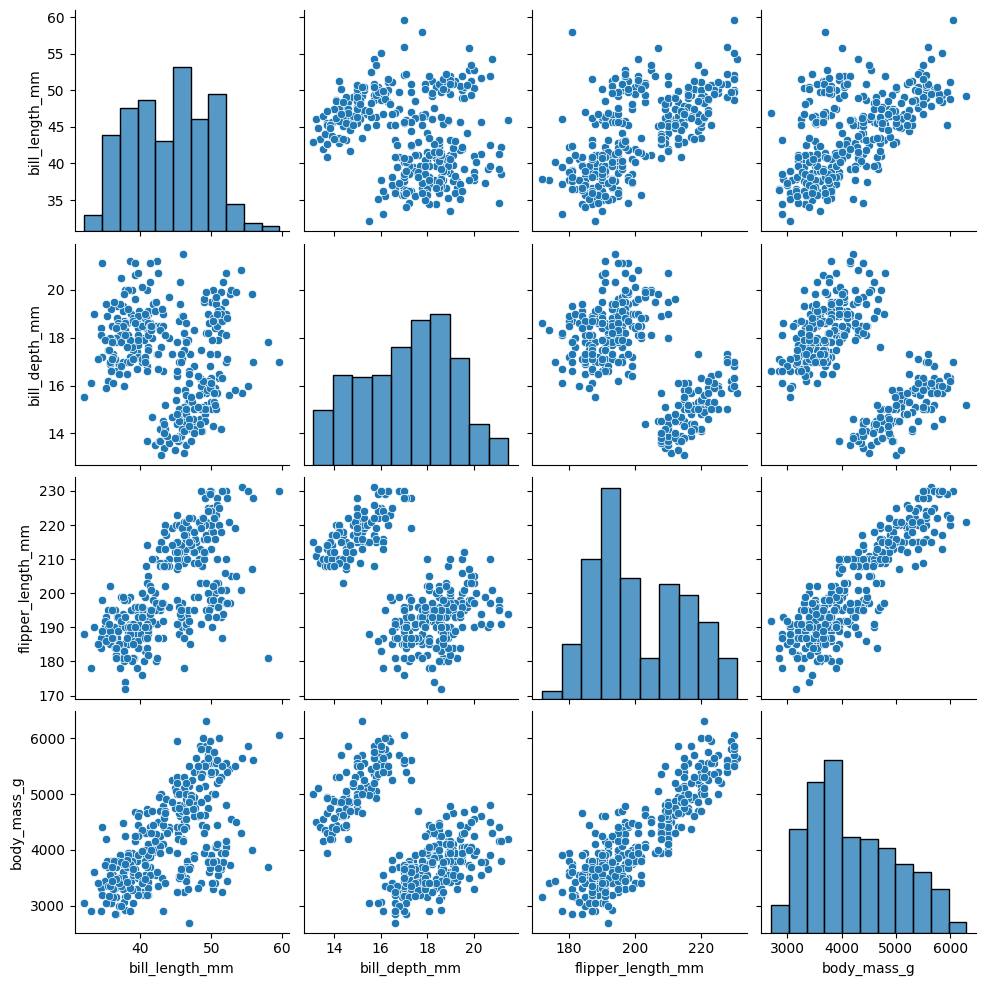

In [39]:
sns.pairplot(df)
plt.show()

# Задание 2. Бинарная классификация персептроном

        Замечание 1: Все классификаторы оформить в виде объектов некоторого написанного вами класса с обязательными конструктором, методами fit() и predict().
        Замечание 2: Для оценку качества работы классификатора использовать метрику качества Accuracy (точность) – доля объектов тестовой выборки, класс которых был распознан правильно.
        Замечание 3: оценку качества работы классификатора выполнять в 2-х вариантах. Сначала используя всю выборку как обучающую и как тестовую (одна оценка accuracy), а потом с разделением исходной выборки на 2 части: 70% - обучающая выборка (по ней будет обучаться классификатор) и 30% - тестовая выборка (объекты этой группы не будут использованы для обучения классификатора). Точность классификации показывать на обеих выборках – обучающей и тестовой. Объяснять различие полученных значений.



### 1. Используя персептрон, постройте бинарный классификатор для определения пола пингвина на основе только числовых признаков. Оцените качество работы классификатора.



### 2. Постройте 3 классификатора для определения пола пингвина на основе числовых признаков для каждого из видов пингвинов. Оцените их качество. Сравните точности классификаторов между собой и с классификатором п.2.1.



### 3. Попробуйте каждый из 3-х классификаторов п.2.2 проверить на всей выборке (т.е. на пингвинах разных видов).



# Задание 3. Бинарная классификация с использованием ADALINE.



Повторите пп.1-3 предыдущего задания, построив классификатор на основе адаптивного нейрона.


### 4. Включите в список признаков вид пингвина, представив его числом (1,2,3) для разных видов. Оцените качество классификации и сравните с результатом пункта 3.1.


### 5. Замените признак вид на три бинарных признака Adelie, Chinstrap, Gentoo, в каждом из которых значение 1 соответствует тому, что данный пингвин принадлежит соответствующему виду: 

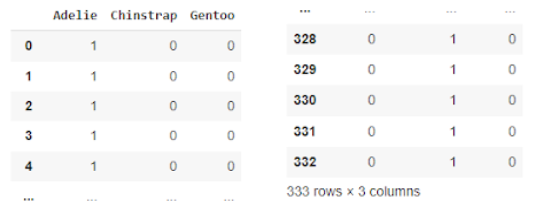

Выполните классификацию по полу, используя уже 7 числовых признаков. Сравните качество классификации с предыдущими вариантами.


### 6. Выполните классификацию по каждому из видов пингвина, используя 5 числовых признаков (4 размера-веса и пол: 1-male, 0-female). Сравните качество классификаторов.

### 7. Повторите предыдущий пункт, добавив к 5 числовым признакам ещё три бинарных, представляющих принадлежность к тому или иному острову.


# Задание 4. Множественная классификация с использованием ADALINE.

Постройте сеть из 4 нейронов. На первом слое три из них определяют принадлежность к одному из трёх видов пингвинов. На втором слое на основе оценок 1-го слоя выносится суждение о том, какому из видов принадлежит конкретный объект. Нейрон этого слоя тоже надо обучить.
Провести расчёты в трёх вариантах: используя 4 числовых слоя (только размеры-веса), используя 5 числовых слоёв (+пол), используя 8 числовых слоёв (+остров).
Оценить качество полученных классификаторов. Сделать вывод.



Оценка за работу 5 баллов.
Дополнительные 2 балла могут быть выставлены, если обучение каждого классификатора сопровождается выводом графика динамики качества обучения по эпохам и диаграммы классификации областей (оси – два числовых признака размер/вес на выбор студента).


Дополнительный 1 балл за вывод перед каждым обучением информации о характере обучения и первых 5-ти строк обучающей выборки.
